Before beginning this exercise you must download some data files, which can be retrieved from here: 

https://northwestern.box.com/s/rsb5wjb7dztg2128flzgex4fmq19havu

Be sure to move the corresponding files to the directory where you are running this notebook. Furthermore, you will need to provide the path to these data as the variable `dataDir`, below.

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

from rhlUtils import BBox, CCD, Image, imshow

%matplotlib notebook 
%config InlineBackend.figure_format = 'retina'

#%matplotlib qt
#%gui qt

dataDir = "/Users/eileengonzales/Dropbox/LSSTC_DSFP/LSSTC-DSFP-Sessions/Session5/Day1/ImageNoise_RHL/"

I've provided you with two datasets ("bias.npz" and "bias2.npz") which are the trimmed image of a CCD from the PFS project.  One has had a bias frame subtracted, one has not.

You can read the data into an Image, and the Image object is also able to return a view of the data from a single
amplifier (in the range 0..7).  For example, you can say:

<IPython.core.display.Javascript object>


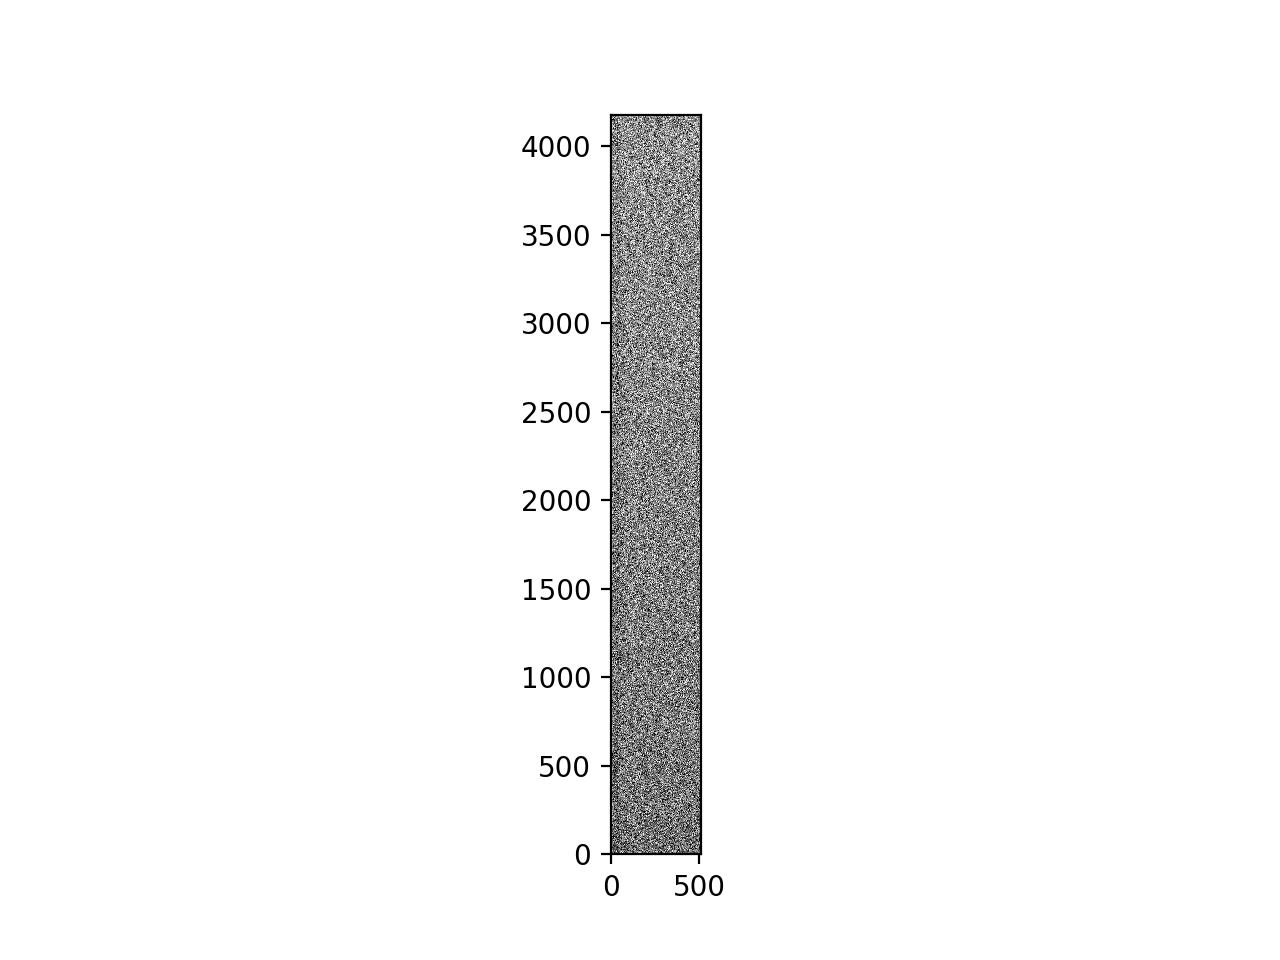

In [22]:
bias = Image(os.path.join(dataDir, "bias.npz"))  #Reads in the data as an image

aim = bias.getAmpImage(0)  #choose a value between 0 and 7

plt.clf()
imshow(aim)     # or you can use plt.imshow if you'd prefer;  imshow is imported from rhlUtils
plt.show();

<IPython.core.display.Javascript object>


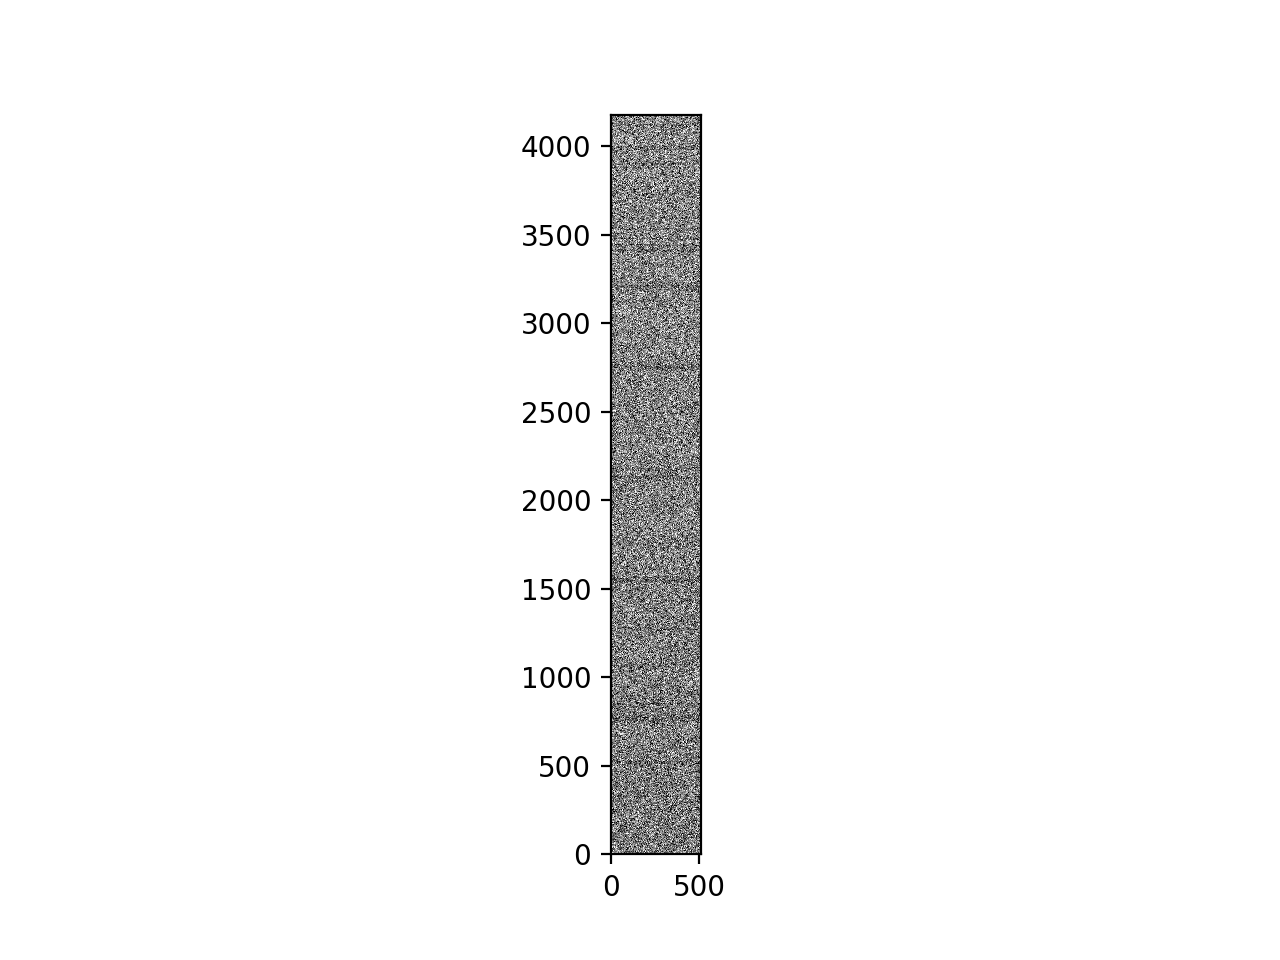

In [28]:
bias = Image(os.path.join(dataDir, "bias2.npz"))  #Reads in the data as an image

aim = bias.getAmpImage(5)  #choose a value between 0 and 7

plt.clf()
imshow(aim)     # or you can use plt.imshow if you'd prefer;  imshow is imported from rhlUtils
plt.show();

Take a look at the entire image.  Hint:  each amplifier has its own gain

Which do you think had a bias frame subtracted?  Why?

**Amps 5 and 6 have structure still, while the others don't have any remining structure

<IPython.core.display.Javascript object>


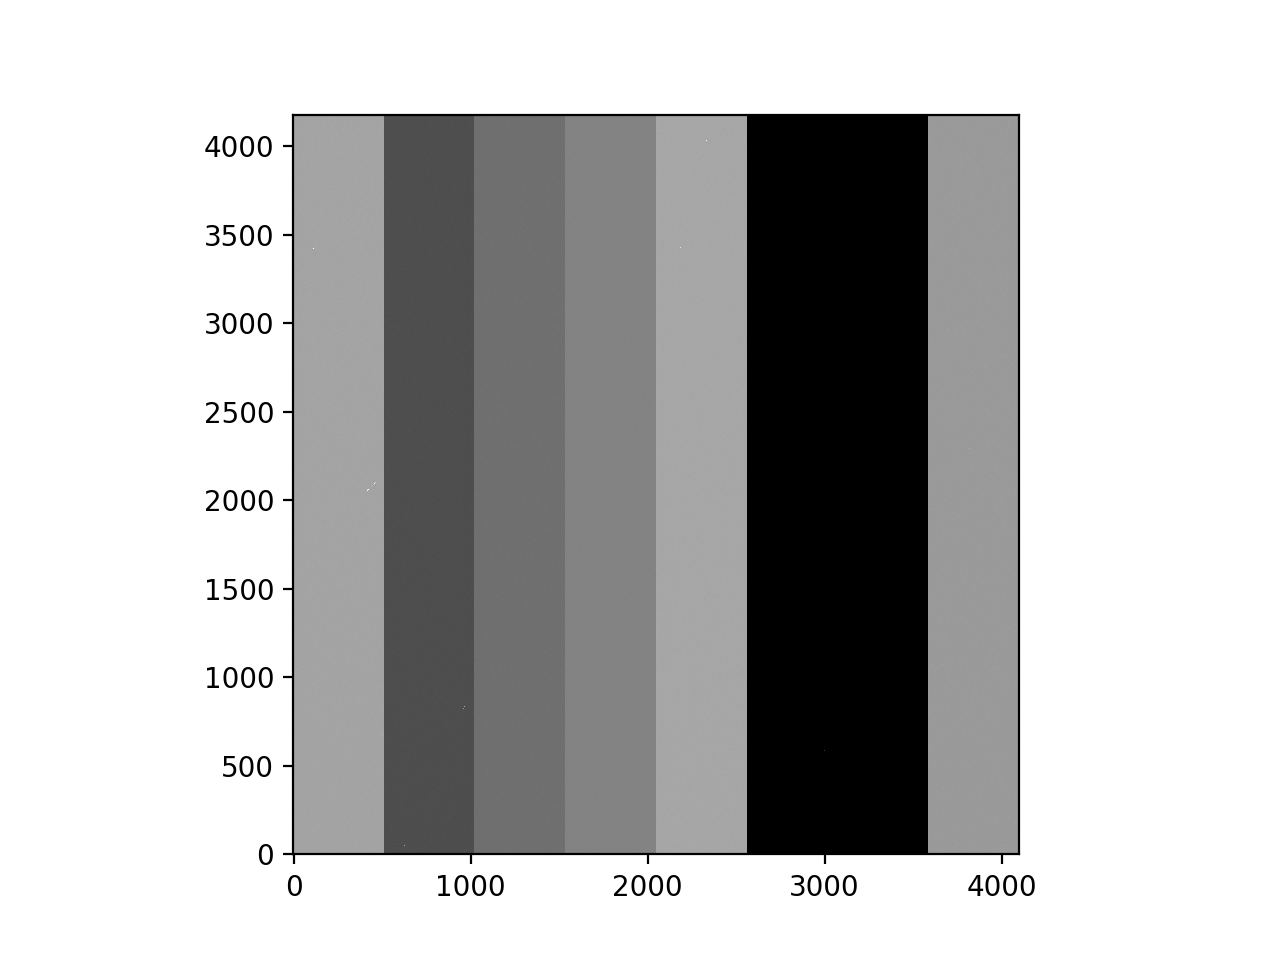

In [46]:
bias = Image(os.path.join(dataDir, "bias.npz"))

aim /= np.median(aim) # fix this so we see the ccd and not just these lines. See his notebook solutions
plt.clf()
imshow(bias.image)
plt.show();  # for bias.npz: So maybe 5 and 6 have been bias subtracted because they are black in this image?

<IPython.core.display.Javascript object>


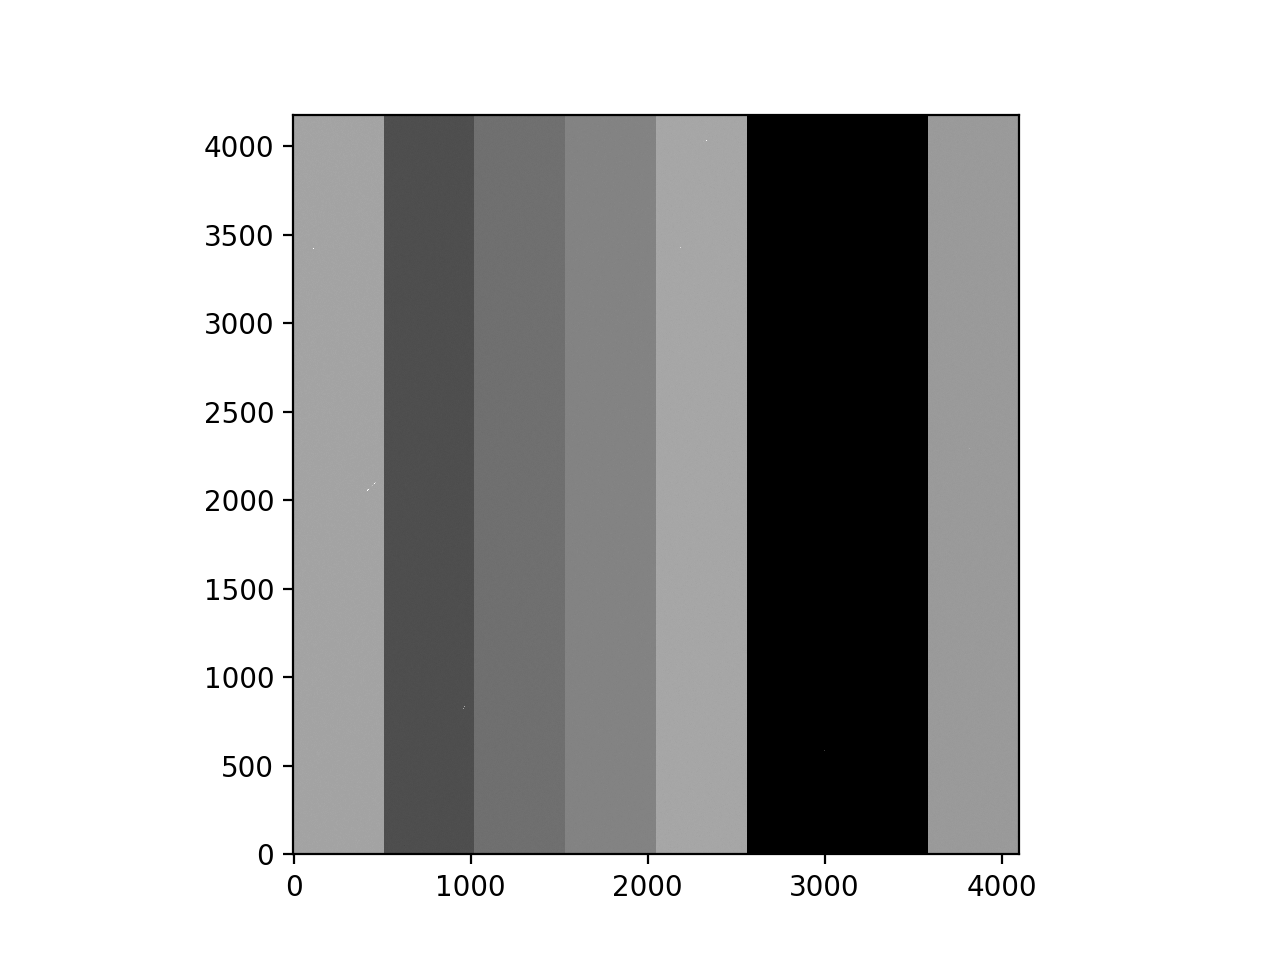

In [27]:
bias2 = Image(os.path.join(dataDir, "bias2.npz"))

plt.clf()
imshow(bias2.image)
plt.show();  
# Both files look the same so now I have no clue.

Write a program to measure the power spectrum of each amplifier separately (but plot them all together).

Each row of the data corresponds to a row of the CCD clocked onto the serial register -- but remember that we have trimmed the data to throw away the extended register and overclock.  The CCD object has the magic numbers you need to correct for this:
-    rawWidth = 552                      # number of pixels digitised per parallel transfer
-    tau_s = 13.92e-6                    # Time for one serial transfer (s)
-    tau_p = 222.72e-6                   # Time for one parallel transfer (s)

There is also some junk in the data (e.g. cosmic rays, transients at the bottom of the chip) that might affect your results -- a simple n-sigma clip might help.

If you've never calculated a power spectrum before you might need some help.  There is code in scipy.signal to do it, but it's a little tricky.  The power spectrum should be essentially flat (but not exactly flat).

Which amplifier has the worst low-frequency behaviour?  Was that what you expected?

In [32]:
CCD.rawWidth  # hit tab to complete to see what is in the CCD object. He gave all the numbers in it already

552

In [42]:
plt.plot(bias.getAmpImage(0).copy().flatten())

<IPython.core.display.Javascript object>


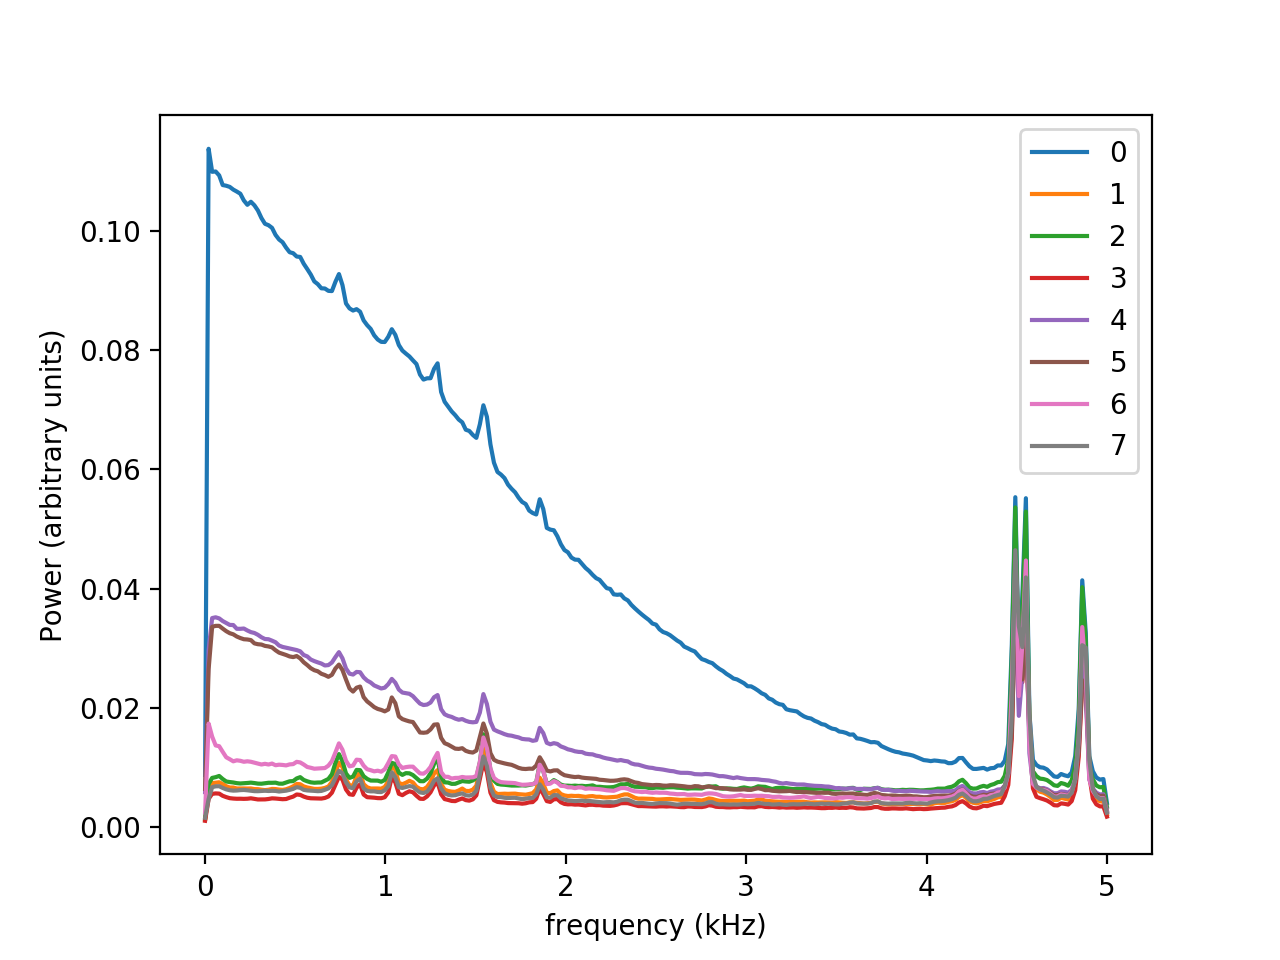

In [47]:
import scipy.signal

bias = Image(os.path.join(dataDir, "bias.npz"))  #bias2.npz

plt.figure(1)
plt.clf()

for ampNo, amp in enumerate(bias.amps):
    dat = bias.getAmpImage(amp)
    fs = 1e4  # sampling frequency
    f, PS = scipy.signal.welch(dat.flatten(), fs, nperseg=512)  #512 because 4096 pixels/8 amplifierrs
    plt.plot(1e-3*f, PS, label=str(ampNo))
    
plt.xlabel("frequency (kHz)")
plt.ylabel("Power (arbitrary units)")
plt.legend(loc='best')
plt.show()
# See his solutions for this part since this is sooo wrong. Still need to sigma clip to remove outliers like cosmic rays

In [ ]:
The amplifier with the worst 